# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | adrar
Processing Record 3 of Set 1 | usinsk
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | flying fish cove
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | wad rawah
Processing Record 12 of Set 1 | hosakote
Processing Record 13 of Set 1 | ponta delgada
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | zalingei
Processing Record 18 of Set 1 | ormond-by-the-sea
Processing Record 19 of Set 1 | happy valley-goose bay
Processing Record 20 of Set 1 | fonte boa
Processing Record 21 of Set 1 | tanki leendert
City not found. 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
#city_data_df.head()

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 576
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        577 non-null    object 
 1   Lat         577 non-null    float64
 2   Lng         577 non-null    float64
 3   Max Temp    577 non-null    float64
 4   Humidity    577 non-null    int64  
 5   Cloudiness  577 non-null    int64  
 6   Wind Speed  577 non-null    float64
 7   Country     572 non-null    object 
 8   Date        577 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 45.1+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

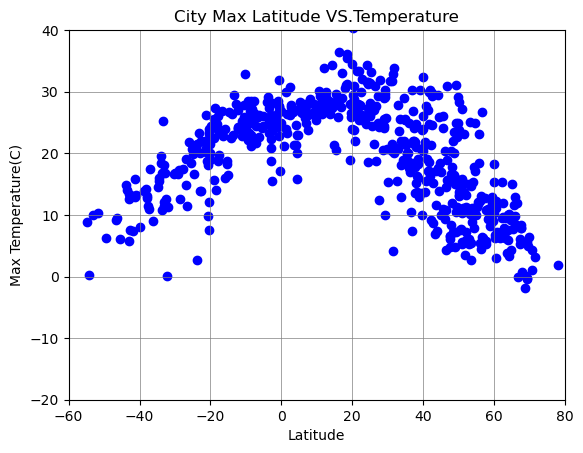

In [8]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature    
x_val=city_data_df["Lat"]
y_val=city_data_df["Max Temp"]

plt.scatter(x_val,y_val,c='Blue' )


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Max Latitude VS.Temperature")
plt.ylim(-20,40)
plt.xlim(-60,80)
plt.grid(color = 'grey', linestyle = '-', linewidth = 0.5)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

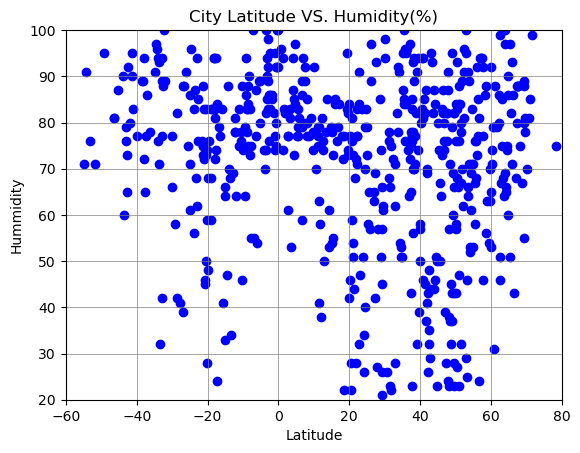

In [9]:
# Build the scatter plots for latitude vs. humidity
x_val=city_data_df["Lat"]
y_val=city_data_df["Humidity"]
plt.scatter(x_val,y_val,c='Blue' )



# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Hummidity")
plt.title("City Latitude VS. Humidity(%)")
plt.ylim(20,100)
plt.xlim(-60,80)
plt.grid(color = 'grey', linestyle = '-', linewidth = 0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

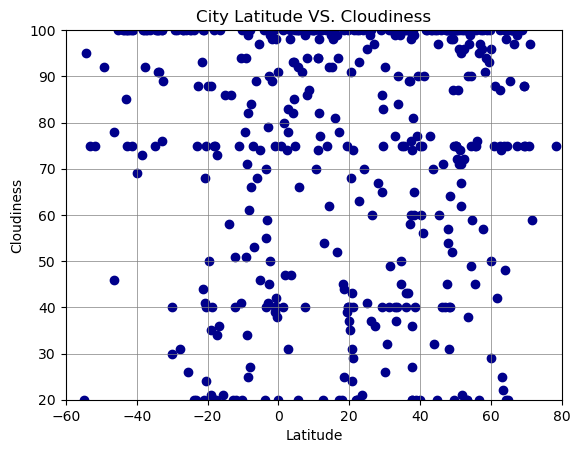

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_val=city_data_df["Lat"]
y_val=city_data_df["Cloudiness"]
plt.scatter(x_val,y_val,c='DarkBlue' )



# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude VS. Cloudiness")
plt.ylim(20,100)
plt.xlim(-60,80)
plt.grid(color = 'grey', linestyle = '-', linewidth = 0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

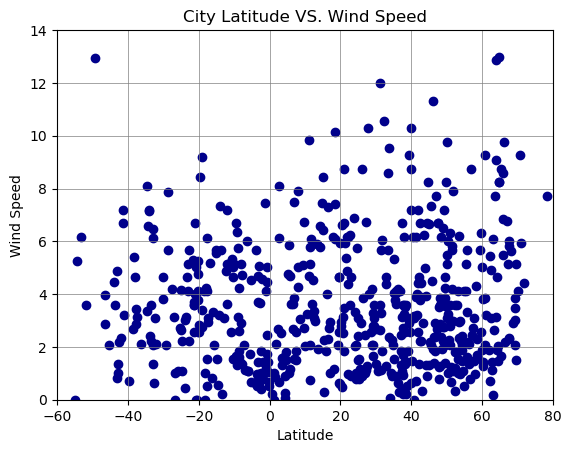

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_val=city_data_df["Lat"]
y_val=city_data_df["Wind Speed"]
plt.scatter(x_val,y_val,c='DarkBlue' )



# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude VS. Wind Speed")
plt.ylim(0,14)
plt.xlim(-60,80)
plt.grid(color = 'grey', linestyle = '-', linewidth = 0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
from scipy import stats
# Define a function to create Linear Regression plots
def plotlinearregression(x_val,y_val,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_val, y_val)
    # Get regression values
    regress_values = x_val * slope + intercept
    line_equation = "y = "+ str(round(slope,2))+ "x +" + str(round(intercept,2))
   


    # Build the scatter plots for latitude vs. wind speed

    plt.scatter(x_val,y_val,c='DarkBlue' )
    plt.plot(x_val,regress_values,"r-")
    plt.annotate(line_equation,text_coordinates, color="red")


    # Incorporate the other graph properties
    plt.xlabel("Latitude")
    plt.title(title)
    plt.grid(color = 'grey', linestyle = '-', linewidth = 0.5)
    
    #print r value
    print(f"The r square value is :{rvalue**2}")    
    # Save the figure
     
    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,9.21,90,100,8.23,US,1685393428
1,adrar,20.5022,-10.0711,30.95,28,68,6.60,MR,1685393429
2,usinsk,65.9939,57.5281,12.92,93,100,6.86,RU,1685393429
5,udachny,66.4167,112.4000,11.92,43,97,2.17,RU,1685393430
10,wad rawah,15.1603,33.1397,28.29,54,92,6.41,SD,1685393431


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,papatowai,-46.5619,169.4708,9.18,81,46,2.88,NZ,1685393429
4,margaret river,-33.9500,115.0667,19.55,76,91,7.13,AU,1685393430
6,waitangi,-43.9535,-176.5597,14.90,90,100,4.47,NZ,1685393430
7,flying fish cove,-10.4217,105.6791,25.82,88,100,4.63,CX,1685393431
8,edinburgh of the seven seas,-37.0676,-12.3116,17.43,86,100,14.34,SH,1685393431


###  Temperature vs. Latitude Linear Regression Plot

The r square value is :0.5808927305400432


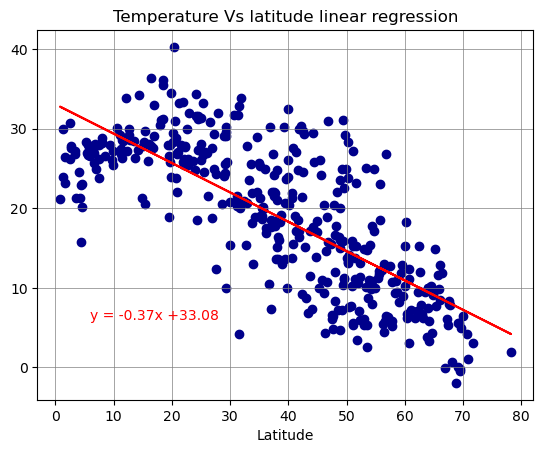

In [18]:
# Linear regression on Northern Hemisphere
plotlinearregression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],"Temperature Vs latitude linear regression",(6,6))



The r square value is :0.6282375183260167


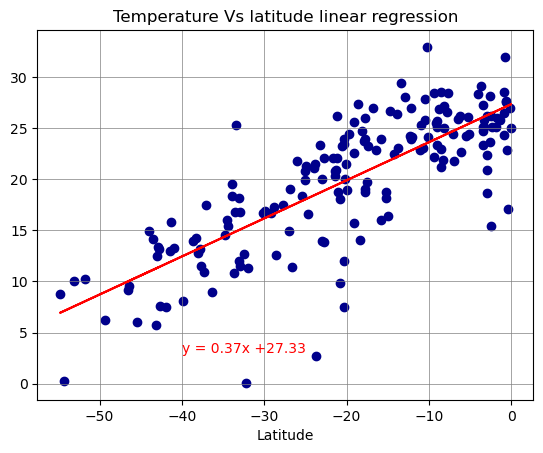

In [42]:
# Linear regression on Southern Hemisphere
plotlinearregression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],"Temperature Vs latitude linear regression",(-40,3))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r square value is :0.00025257284357659785


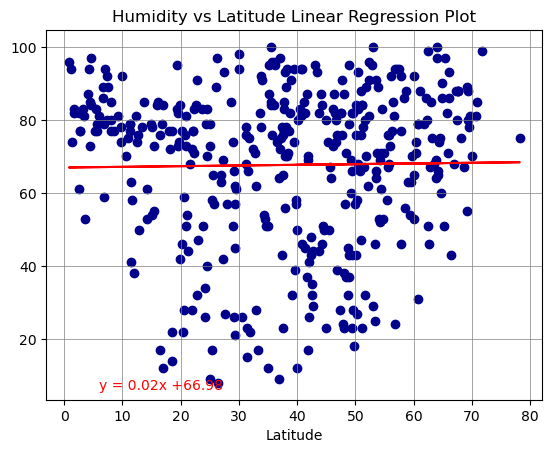

In [19]:
# Northern Hemisphere
plotlinearregression(northern_hemi_df['Lat'],northern_hemi_df["Humidity"],"Humidity vs Latitude Linear Regression Plot",(6,8))

The r square value is :0.0024194291769912765


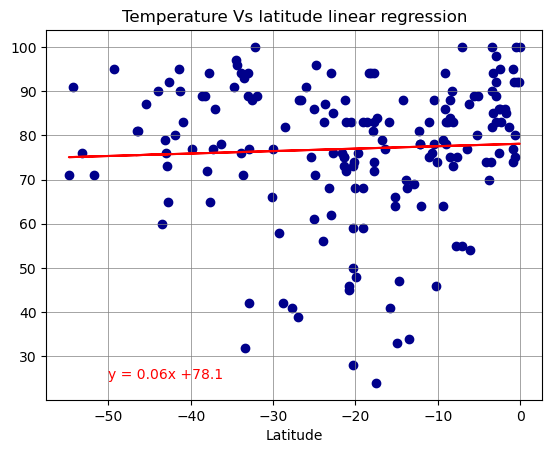

In [40]:
# Southern Hemisphere
plotlinearregression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],"Temperature Vs latitude linear regression",(-50,25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r square value is :0.0031134844559928786


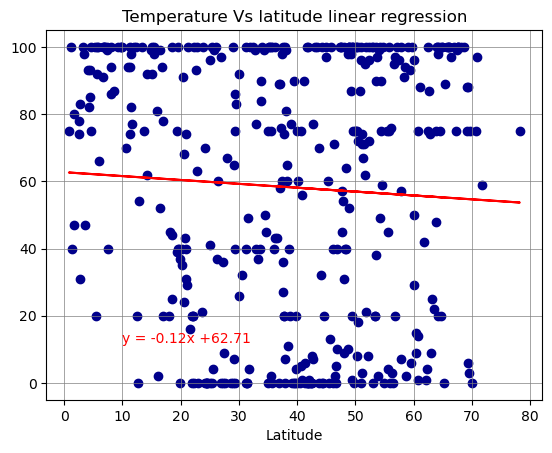

In [39]:
# Northern Hemisphere
plotlinearregression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],"Temperature Vs latitude linear regression",(10,12))

The r square value is :0.04716007542534867


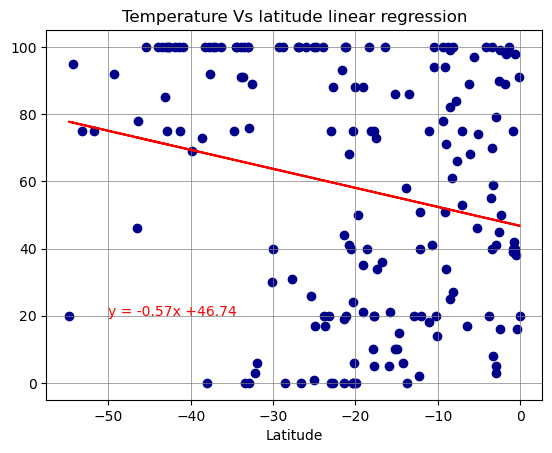

In [37]:
# Southern Hemisphere
plotlinearregression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],"Temperature Vs latitude linear regression",(-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r square value is :0.0074105183121887675


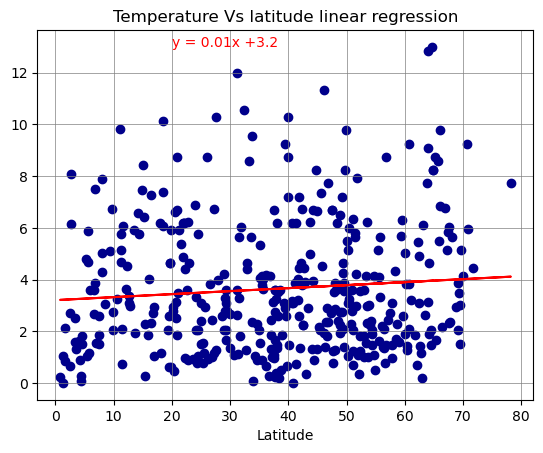

In [31]:
# Northern Hemisphere
plotlinearregression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],"Temperature Vs latitude linear regression",(20,13))

The r square value is :0.044616409996446976


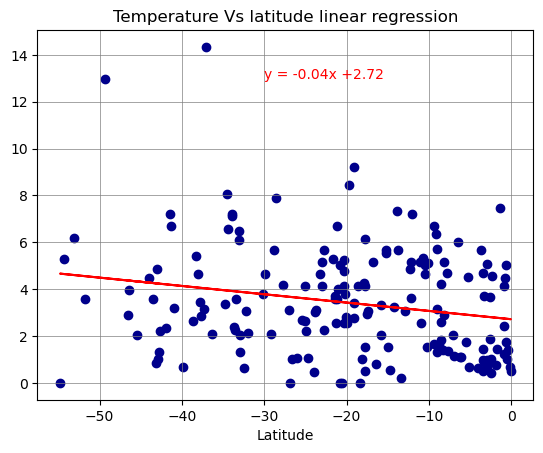

In [34]:
# Southern Hemisphere
plotlinearregression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],"Temperature Vs latitude linear regression",(-30,13))

**Discussion about the linear relationship:** YOUR RESPONSE HERE